# Decision Tree Depth Analysis on 80/20 Split

In this section, we:

- Focus on the 80/20 split to analyze how the maximum depth of the decision tree impacts model accuracy.
- Experiment with various `max_depth` values to explore the trade-off between model complexity and performance.
- Visualize the tree models with various `max_depth` parameters using Graphviz 
- Summarize the results in both a table and a plot to clearly illustrate the relationship between tree depth and accuracy.

Total samples: 366

Missing values per column:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_micr

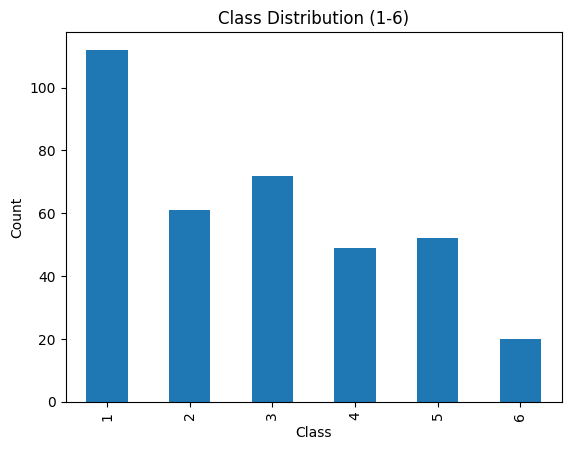

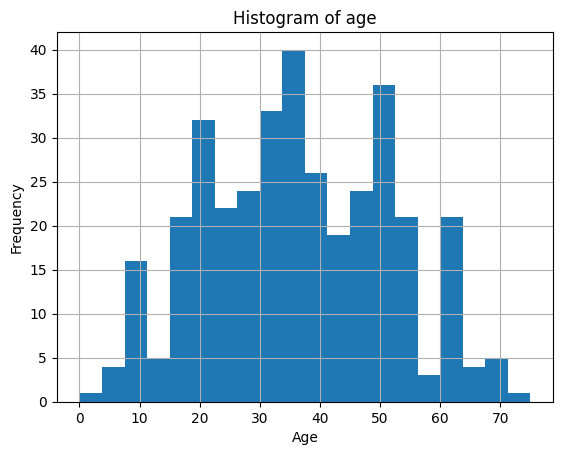

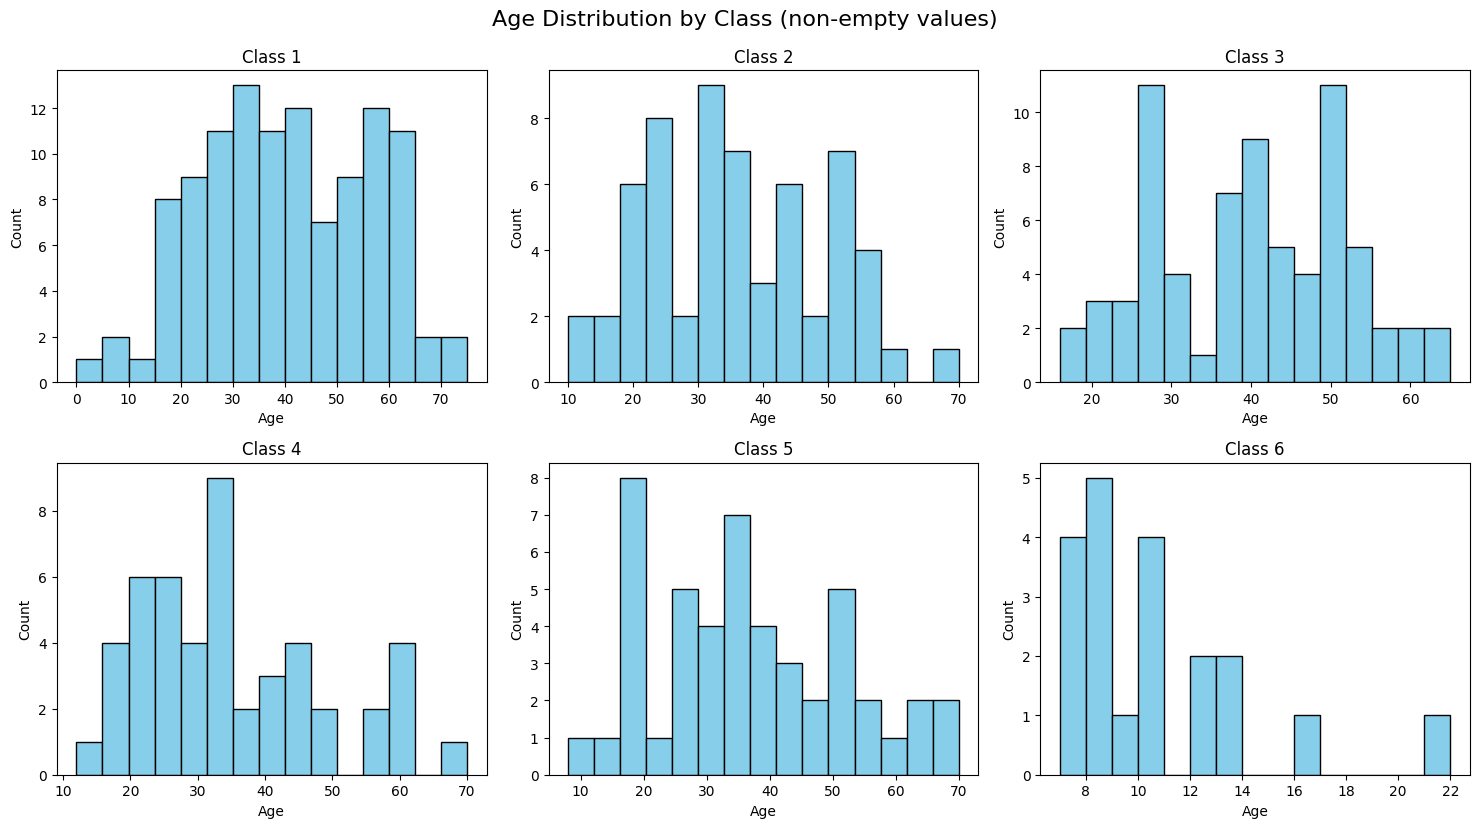


Missing after imputation:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess             

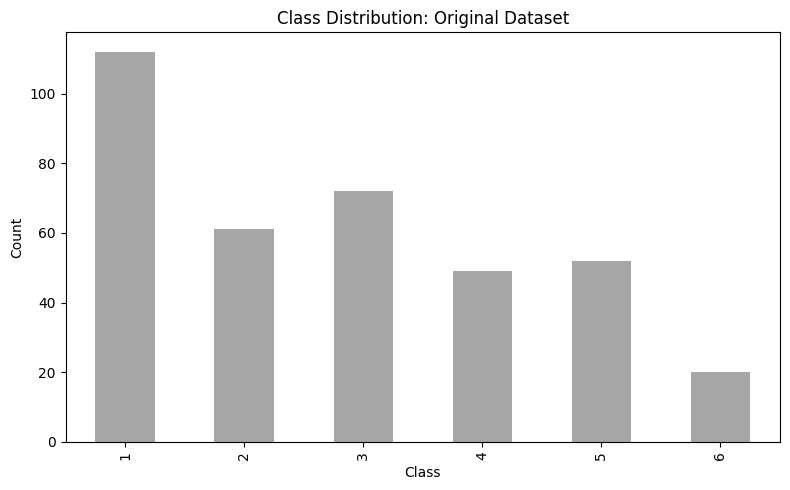

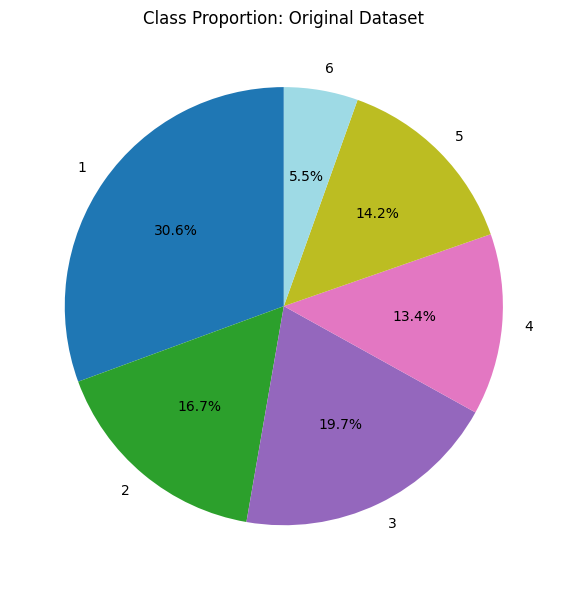

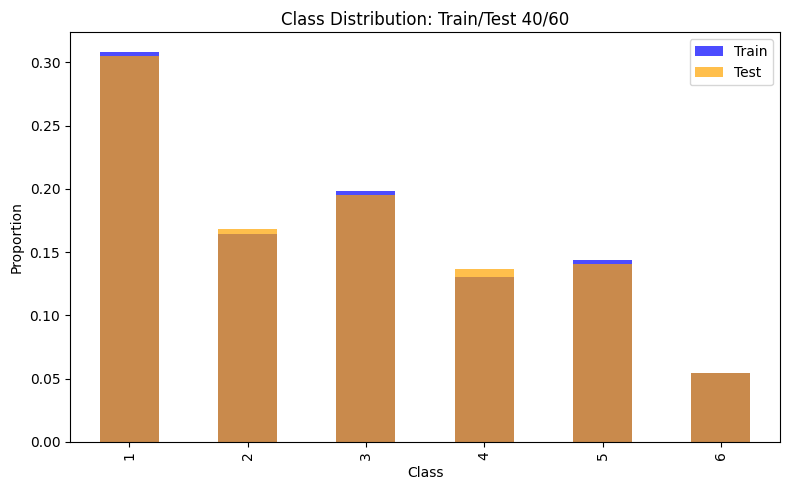

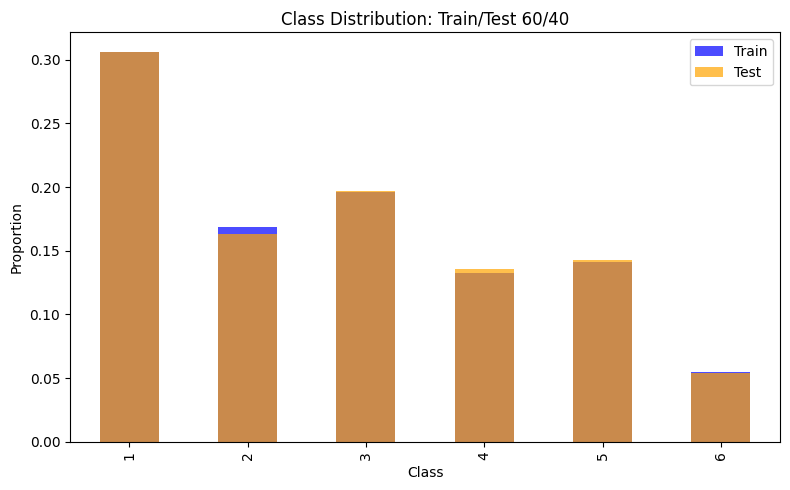

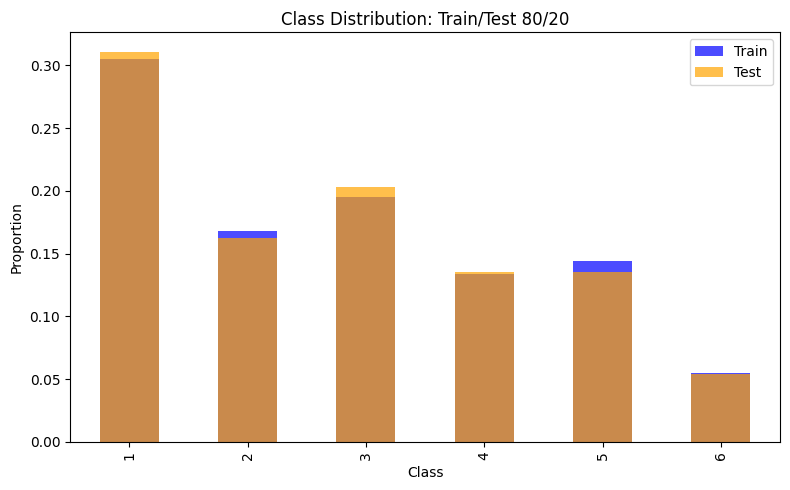

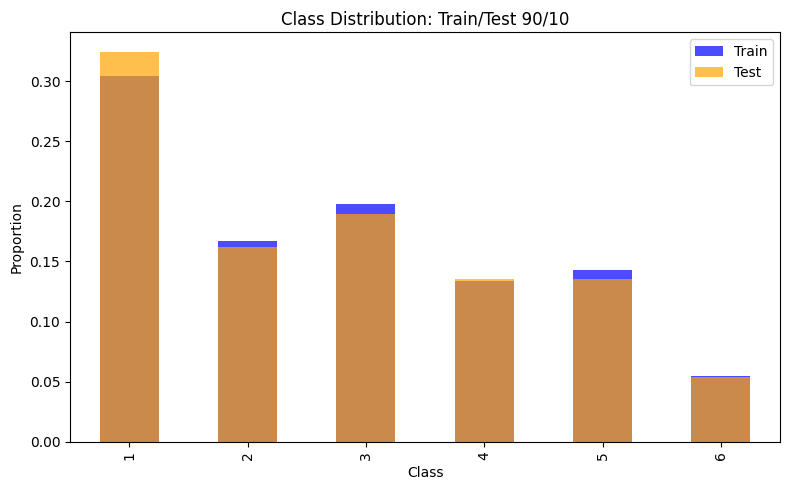

✅ Summary saved to ../../results/additional_dataset\split_summary.csv

Split Summary:
  Split Ratio  Train Size  Test Size  Train Class 1  Test Class 1  \
0       40/60         146        220             45            67   
1       60/40         219        147             67            45   
2       80/20         292         74             89            23   
3       90/10         329         37            100            12   

   Train Class 2  Test Class 2  Train Class 3  Test Class 3  Train Class 4  \
0             24            37             29            43             19   
1             37            24             43            29             29   
2             49            12             57            15             39   
3             55             6             65             7             44   

   Test Class 4  Train Class 5  Test Class 5  Train Class 6  Test Class 6  
0            30             21            31              8            12  
1            20          

In [2]:
%run additional_dataset_preparation.ipynb

In [3]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import graphviz
from tabulate import tabulate

=== Decision Tree Depth Analysis on 80/20 Split ===


--- Max Depth: None ---
Accuracy: 0.9189

Decision Tree Visualization (max_depth=None):


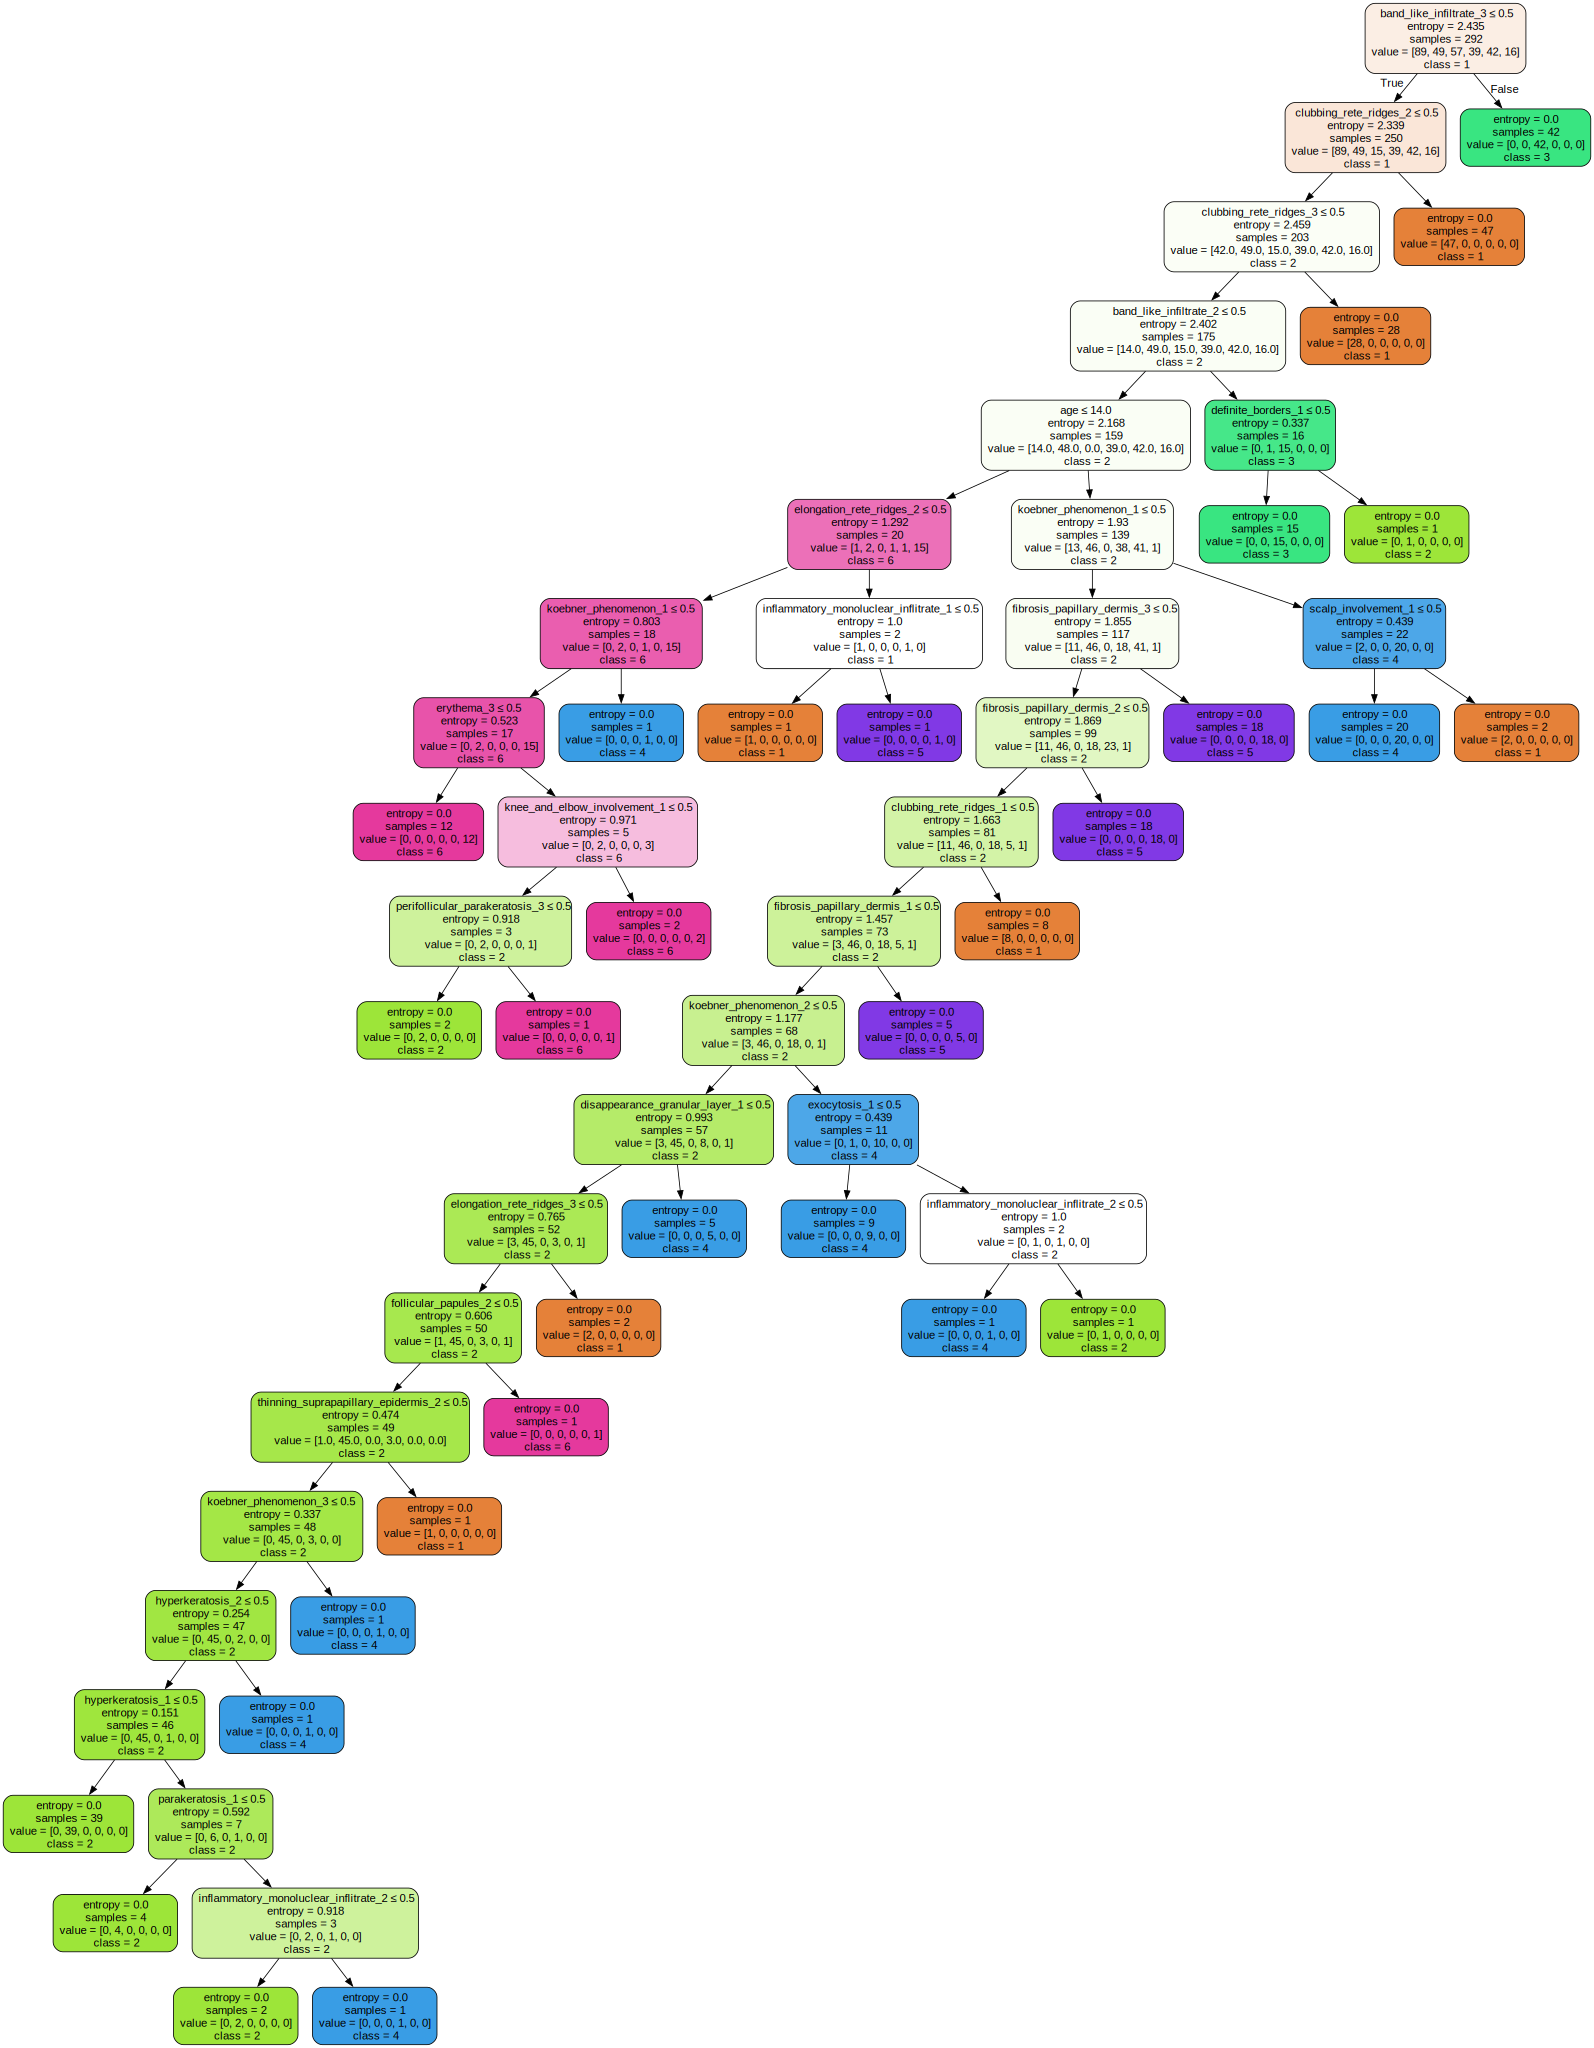



--- Max Depth: 2 ---
Accuracy: 0.4730

Decision Tree Visualization (max_depth=2):


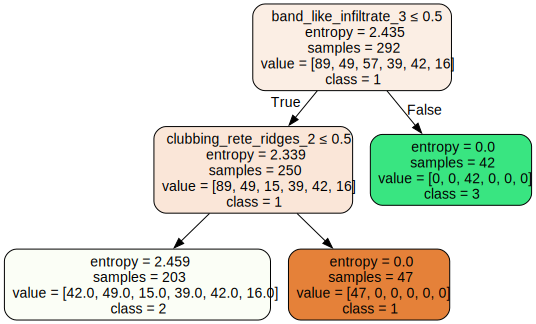



--- Max Depth: 3 ---
Accuracy: 0.5541

Decision Tree Visualization (max_depth=3):


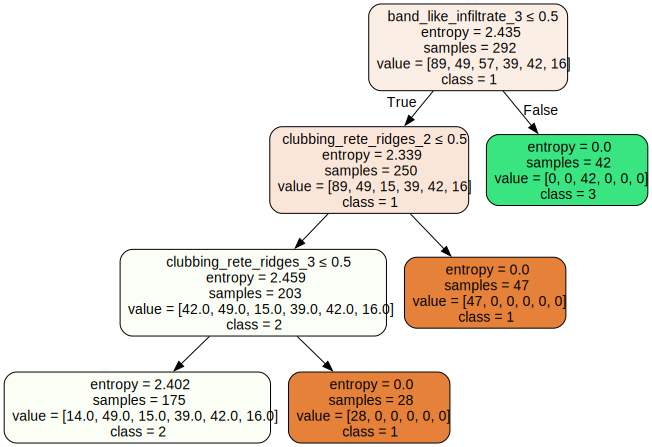



--- Max Depth: 4 ---
Accuracy: 0.6216

Decision Tree Visualization (max_depth=4):


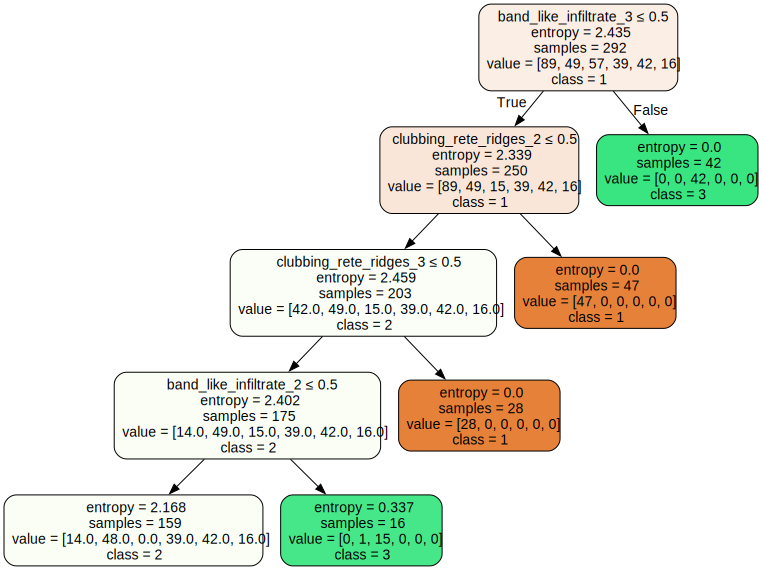



--- Max Depth: 5 ---
Accuracy: 0.6216

Decision Tree Visualization (max_depth=5):


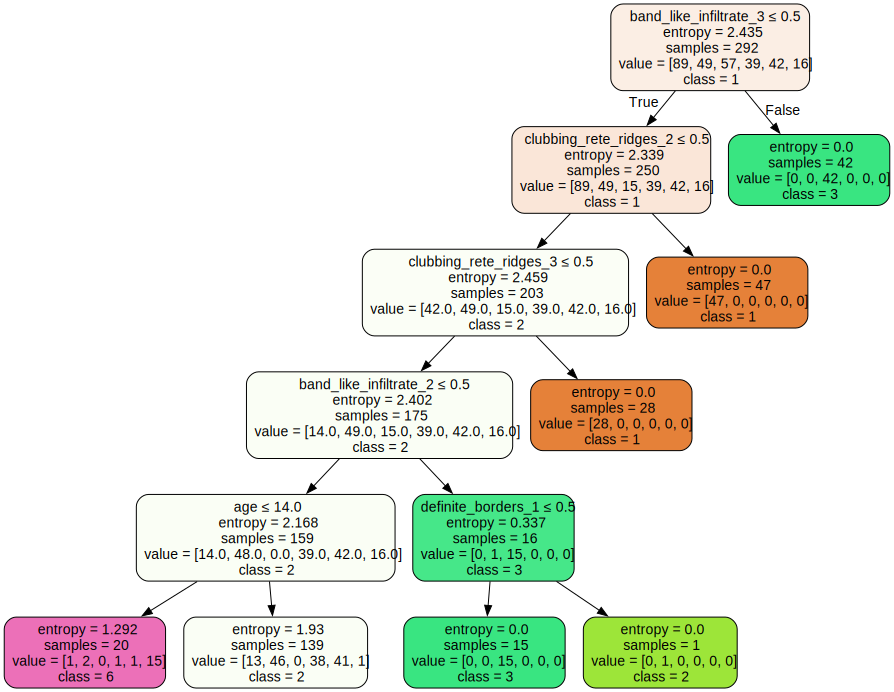



--- Max Depth: 6 ---
Accuracy: 0.6757

Decision Tree Visualization (max_depth=6):


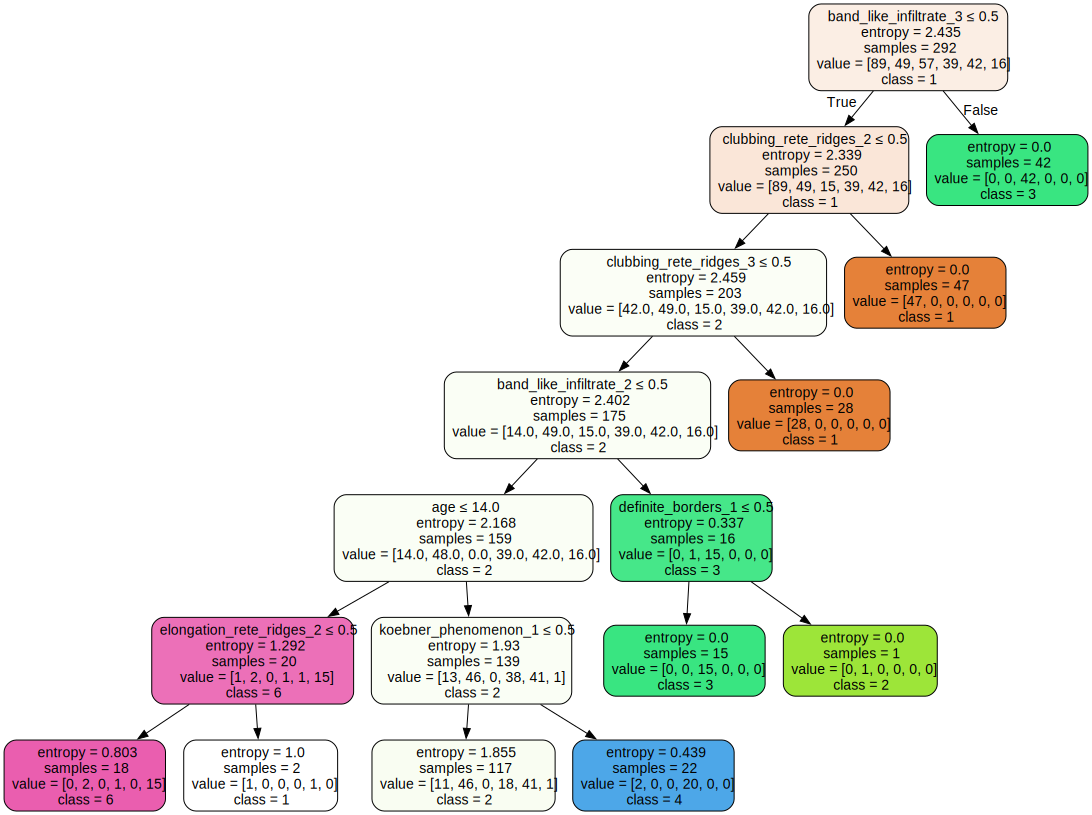



--- Max Depth: 7 ---
Accuracy: 0.7297

Decision Tree Visualization (max_depth=7):


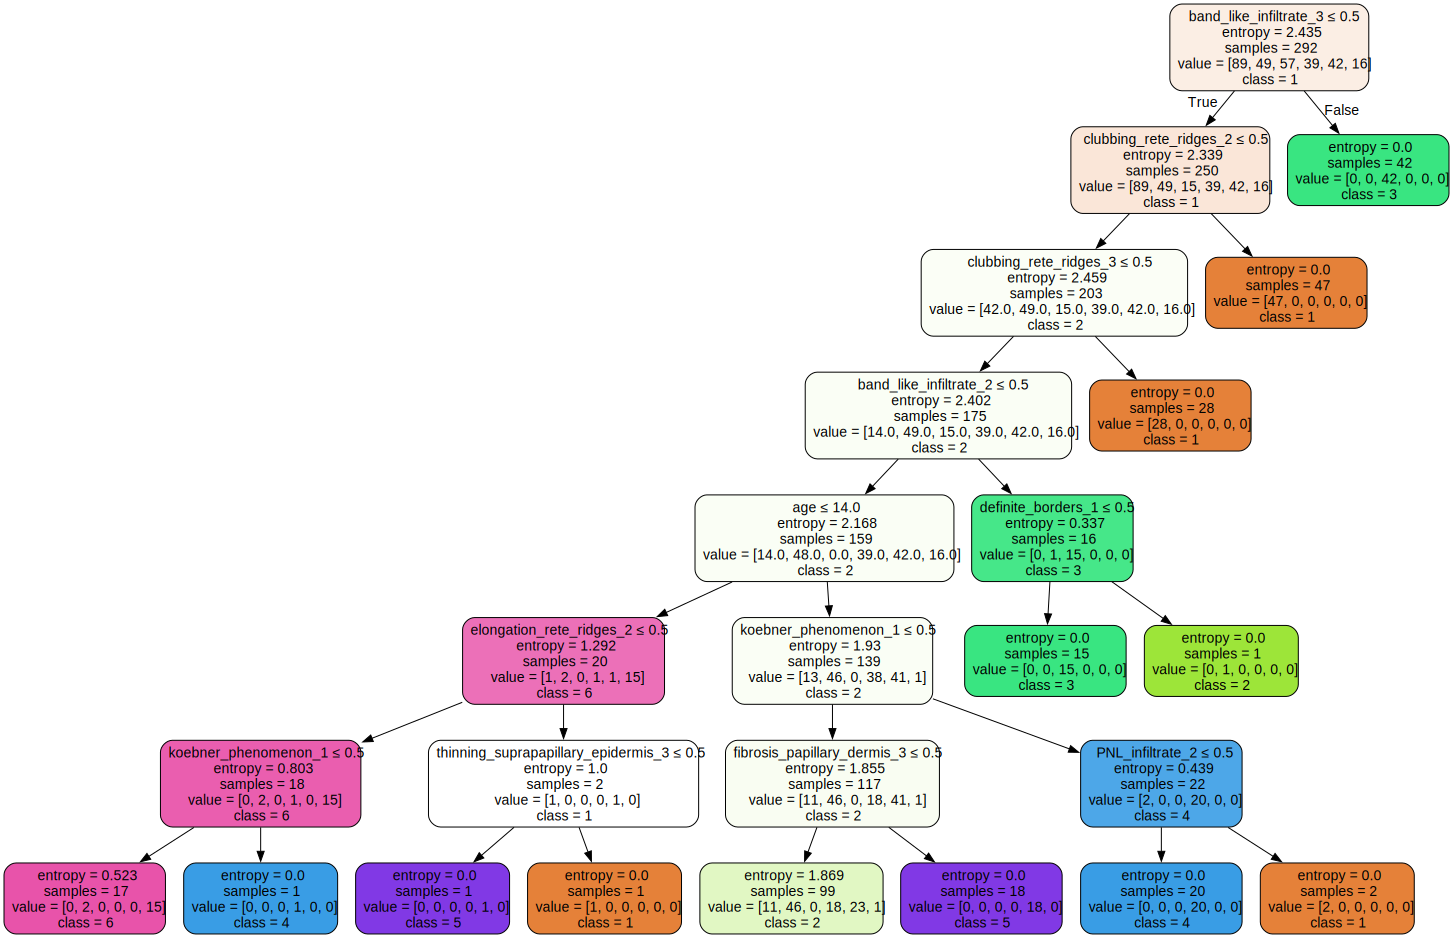

In [4]:

# Define different max_depth values to test
max_depths = [None, 2, 3, 4, 5, 6, 7]

# Store accuracy results for comparison
depth_accuracies = []

# Focus on 80/20 split for depth analysis
X_train, X_test = feature_train_80_20, feature_test_80_20
y_train, y_test = label_train_80_20, label_test_80_20

print("=== Decision Tree Depth Analysis on 80/20 Split ===\n")

for max_depth in max_depths:
    print(f"\n--- Max Depth: {max_depth} ---")
    
    # Create and train the decision tree
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    depth_accuracies.append((max_depth, accuracy))
    
    # Print classification report
    print(f"Accuracy: {accuracy:.4f}")
    
    # Visualize the tree using Graphviz
    dot_data = export_graphviz(
        clf, out_file=None, 
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in sorted(y_train.unique())],
        filled=True, rounded=True, special_characters=True
    )
    graph = graphviz.Source(dot_data)
    print(f"\nDecision Tree Visualization (max_depth={max_depth}):")
    display(graph)
    
    print("\n" + "="*80) # print the seperator

Max Depth vs Accuracy Table
╒═════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═════════╕
│ max_depth   │     None │        2 │        3 │        4 │        5 │        6 │       7 │
╞═════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═════════╡
│ Accuracy    │ 0.918919 │ 0.472973 │ 0.554054 │ 0.621622 │ 0.621622 │ 0.675676 │ 0.72973 │
╘═════════════╧══════════╧══════════╧══════════╧══════════╧══════════╧══════════╧═════════╛


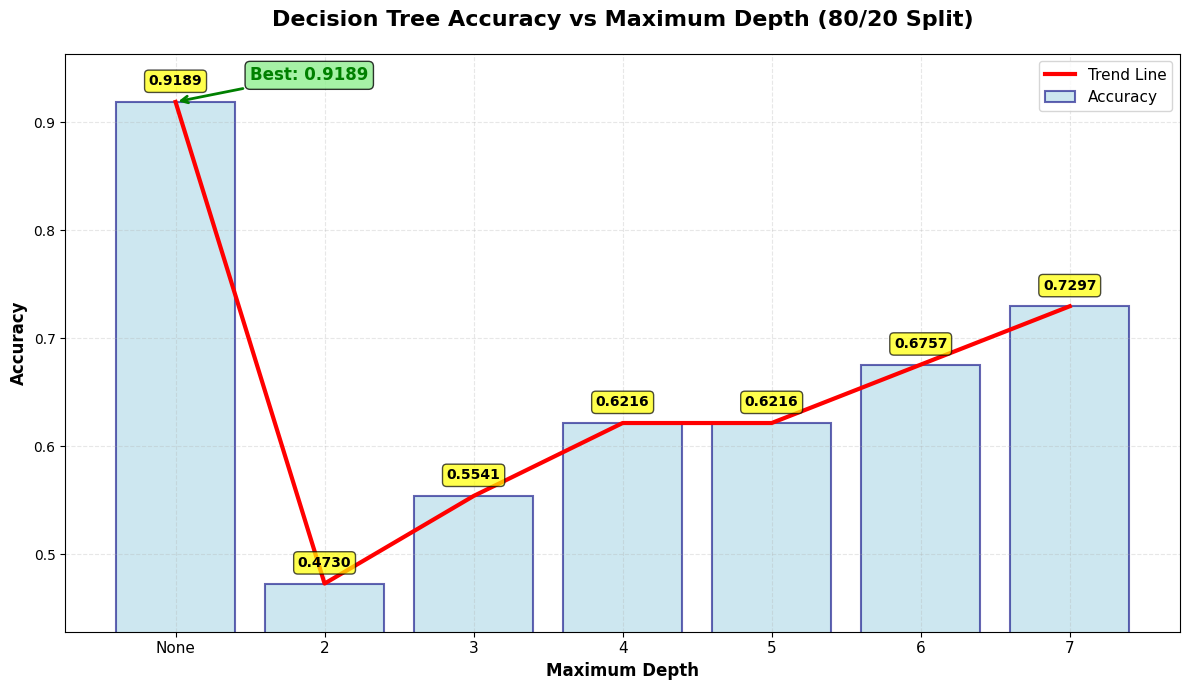

In [5]:
depths, accuracies = zip(*depth_accuracies)
depths_str = ['None' if d is None else str(d) for d in depths]

# Print the accuracy for each max depth table
print("Max Depth vs Accuracy Table")
table_data = [['max_depth'] + depths_str, ['Accuracy'] + list(accuracies)]
print(tabulate(table_data, headers='firstrow', tablefmt='fancy_grid'))

# Plot accuracy comparison across different max_depth values with combined bar and line chart
plt.figure(figsize=(12, 7))

# Create bar chart
bars = plt.bar(range(len(depths)), accuracies, alpha=0.6, color='lightblue', 
               edgecolor='navy', linewidth=1.5, label='Accuracy')

# Add line plot on top
plt.plot(range(len(depths)), accuracies, linewidth=3, markersize=10, 
         color='red', markerfacecolor='darkred', label='Trend Line')

# Customize the plot
plt.xticks(range(len(depths)), depths_str, fontsize=11)
plt.xlabel('Maximum Depth', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Decision Tree Accuracy vs Maximum Depth (80/20 Split)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')

# Set y-axis to show full range of accuracy values with some padding
min_acc = min(accuracies)
max_acc = max(accuracies)
padding = (max_acc - min_acc) * 0.1  # 10% padding
plt.ylim(max(0, min_acc - padding), min(1.0, max_acc + padding))

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.4f}', (i, acc), textcoords="offset points", 
                xytext=(0,12), ha='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Add legend
plt.legend(loc='upper right', fontsize=11)

# Highlight the best performing depth
best_idx = accuracies.index(max(accuracies))
plt.annotate(f'Best: {max(accuracies):.4f}', 
             xy=(best_idx, max(accuracies)), 
             xytext=(best_idx + 0.5, max(accuracies) + 0.02),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=12, fontweight='bold', color='green',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

plt.tight_layout()
plt.show()


## Insights on the statistics reported

The model’s accuracy shows a clear positive correlation with the maximum depth of the decision tree. 

At a shallow depth of 2, the accuracy is only around 0.47—marginally better than random guessing across six classes (which would yield roughly 16.7%) but still far from sufficient. This highlights how limited model capacity at low depth fails to capture the complexity of the data, especially for a task as sensitive as medical diagnostics.

As the depth increases, accuracy improves steadily, ultimately reaching 0.91 when no depth limit is imposed. However, the model’s performance reaches a plateau between depths 4 and 5, where the accuracy remains unchanged at 0.6216, which suggests that the additional layer contributes little to improving prediction quality—possibly resolving only marginal patterns that don’t significantly influence overall outcomes.

Beyond this plateau, accuracy continues to improve with depth, indicating that additional layers enable the model to form more refined and specific decision boundaries. Given that the dataset contains over 30 input features and considerable class overlap, deeper trees likely help disentangle complex relationships between features and classes.

Overall, the trend indicates that deeper trees are better suited for this classification task, though care must be taken to balance performance gains with the risk of overfitting.